In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

# Upload file Kaggle JSON API
uploaded = files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d farahseifeld/greenhouse-cucumber-growth-stages
!kaggle datasets download -d kareem3egm/cucumber-plant-diseases-dataset

Saving kaggle.json to kaggle.json
100% 2.24G/2.24G [01:45<00:00, 27.6MB/s]
100% 2.24G/2.24G [01:45<00:00, 22.8MB/s]
100% 759M/760M [00:35<00:00, 19.7MB/s]
100% 760M/760M [00:35<00:00, 22.5MB/s]


In [ ]:
# Ekstrak dataset
dataset1_path = "/content/cucumber-plant-diseases-dataset.zip"
extracted1_folder = "/content/dataset/cucumber/"

with zipfile.ZipFile(dataset1_path, 'r') as zip_ref:
    zip_ref.extractall(extracted1_folder)

# Ekstrak dataset
dataset2_path = "/content/greenhouse-cucumber-growth-stages.zip"
extracted2_folder = "/content/dataset/cucumber/"

with zipfile.ZipFile(dataset2_path, 'r') as zip_ref:
    zip_ref.extractall(extracted2_folder)

# Baca dataset
%ls

cucumber-plant-diseases-dataset.zip  dataset/  greenhouse-cucumber-growth-stages.zip  sample_data/


In [ ]:
def merge_directories(source_dir, destination_dir):
    # Memeriksa apakah direktori tujuan sudah ada; jika tidak, maka akan dibuat
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    # Menyatukan file dari direktori sumber ke direktori tujuan
    for filename in os.listdir(source_dir):
        source_path = os.path.join(source_dir, filename)
        destination_path = os.path.join(destination_dir, filename)

        # Jika file dengan nama yang sama sudah ada di direktori tujuan, tambahkan _1, _2, dst.
        i = 1
        while os.path.exists(destination_path):
            base, extension = os.path.splitext(filename)
            filename = f"{base}_{i}{extension}"
            destination_path = os.path.join(destination_dir, filename)
            i += 1

        shutil.copy2(source_path, destination_path)



In [ ]:
#merge data yang sama
merge_directories('/content/dataset/cucumber/Cucumber plant diseases dataset/testing/Ill_cucumber', '/content/dataset/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber')
merge_directories('/content/dataset/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber','/content/dataset/cucumber/Unhealthy Leaves/Unhealthy Leaves/' )


In [ ]:
shutil.move('/content/dataset/cucumber/Healthy Leaves/Healthy Leaves/', '/content/dataset/cucumber/fix data/')

'/content/dataset/cucumber/fix data/Healthy Leaves'

In [ ]:
merge_directories('/content/dataset/cucumber/Cucumber plant diseases dataset/testing/good_Cucumber', '/content/dataset/cucumber/Cucumber plant diseases dataset/training/good_Cucumber')
merge_directories('/content/dataset/cucumber/Cucumber plant diseases dataset/training/good_Cucumber','/content/dataset/cucumber/fix data/Healthy Leaves')

In [ ]:
shutil.move('/content/dataset/cucumber/Unhealthy Leaves/Unhealthy Leaves/', '/content/dataset/cucumber/fix data/')

'/content/dataset/cucumber/fix data/Unhealthy Leaves'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
shutil.move('/content/drive/MyDrive/dataset/timun rusak', '/content/dataset/cucumber/fix data/')
shutil.move('/content/drive/MyDrive/dataset/timun sehat', '/content/dataset/cucumber/fix data/')

'/content/dataset/cucumber/fix data/timun sehat'

In [ ]:
# Make Join file
source_path = '/content/dataset/cucumber/fix data'

HL = os.path.join(source_path, 'Healthy Leaves')
UL = os.path.join(source_path, 'Unhealthy Leaves')
HF = os.path.join(source_path, 'timun sehat')
UF = os.path.join(source_path, 'timun rusak')

# Deletes all non-image files (there are two .db files bundled into the dataset)
# !find /content/dataset -type f ! -name "*.JPG" -exec rm {} +

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(HL))} HL.")
print(f"There are {len(os.listdir(UL))} UL.")
print(f"There are {len(os.listdir(HF))} HF.")
print(f"There are {len(os.listdir(UF))}  UF.")

There are 382 HL.
There are 482 UL.
There are 103 HF.
There are 93  UF.


C_Fruit
C_Flow
CHL
LUC

setelah dapat file bisa kita lihat contoh file di bawah

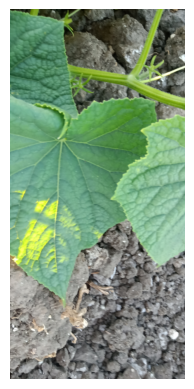

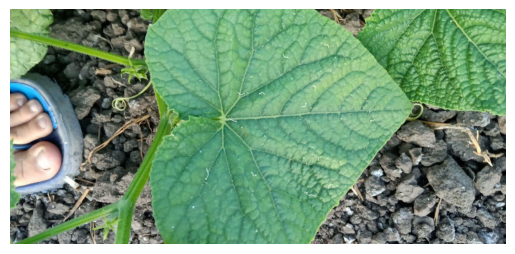

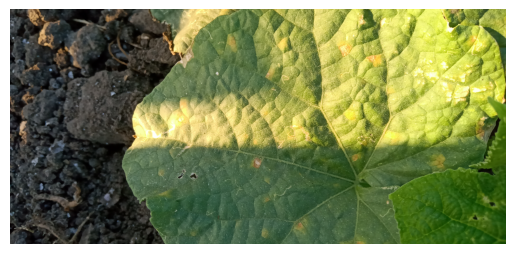

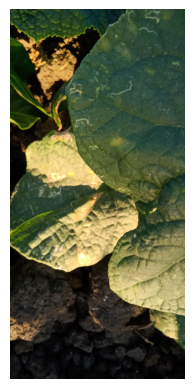

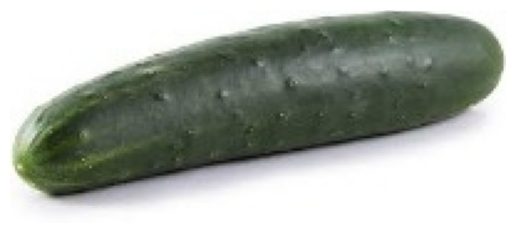

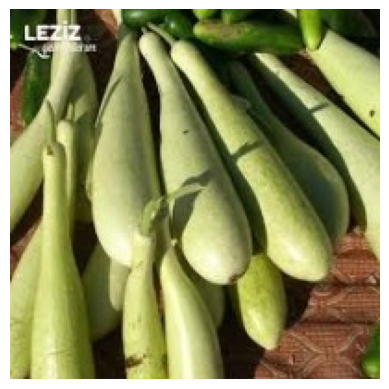

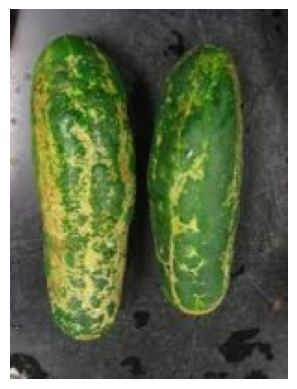

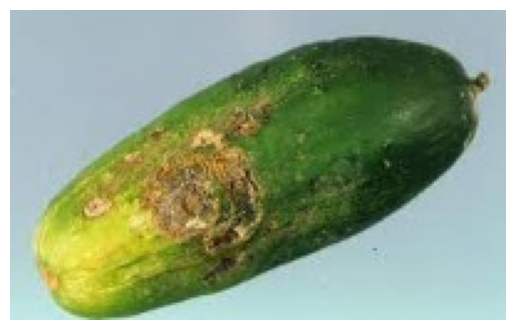

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg

HL_files = os.listdir(HL)
UL_files = os.listdir(UL)
HF_files = os.listdir(HF)
UF_files = os.listdir(UF)

pic_index = 2

Next_C_Fruit  = [os.path.join(HL, fname)
                for fname in HL_files[pic_index-2:pic_index]]
Next_C_Flow  = [os.path.join(UL, fname)
                for fname in UL_files[pic_index-2:pic_index]]
Next_CHL = [os.path.join(HF, fname)
                for fname in HF_files[pic_index-2:pic_index]]
Next_LUC = [os.path.join(UF, fname)
                for fname in UF_files[pic_index-2:pic_index]]

for i, img_path in enumerate(Next_C_Fruit+Next_C_Flow+Next_CHL+Next_LUC):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

split file ke dalam direktori validation dan training

In [ ]:
# Define root directory
root_dir = '/content/dataset/cucumber/train-val/'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# Make function for crate train val dir
def create_train_val_dirs(root_path):

  # train dir and val dir
  train_dir = os.path.join(root_path,'training')
  val_dir = os.path.join(root_path, 'validation')

  os.makedirs(train_dir)
  os.makedirs(val_dir)
  # Create subdirectories for cats and dogs in the training set
  HL_tdir = os.path.join(train_dir, 'HL')
  UL_tdir = os.path.join(train_dir, 'UL')
  HF_tdir = os.path.join(train_dir, 'HF')
  UF_tdir = os.path.join(train_dir, 'UF')

  os.makedirs(HL_tdir)
  os.makedirs(UL_tdir)
  os.makedirs(HF_tdir)
  os.makedirs(UF_tdir)

  # Create subdirectories for cats and dogs in the validation set
  HL_vdir = os.path.join(val_dir, 'HL')
  UL_vdir = os.path.join(val_dir, 'UL')
  HF_vdir = os.path.join(val_dir, 'HF')
  UF_vdir = os.path.join(val_dir, 'UF')


  os.makedirs(HL_vdir)
  os.makedirs(UL_vdir)
  os.makedirs(HF_vdir)
  os.makedirs(UF_vdir)

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/dataset/cucumber/train-val/validation
/content/dataset/cucumber/train-val/training
/content/dataset/cucumber/train-val/validation/HF
/content/dataset/cucumber/train-val/validation/UF
/content/dataset/cucumber/train-val/validation/UL
/content/dataset/cucumber/train-val/validation/HL
/content/dataset/cucumber/train-val/training/HF
/content/dataset/cucumber/train-val/training/UF
/content/dataset/cucumber/train-val/training/UL
/content/dataset/cucumber/train-val/training/HL


Split data

In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  all_files = []
  file_list = os.listdir(SOURCE_DIR)

  for file_name in file_list:
    file_path = os.path.join(SOURCE_DIR, file_name)

    file_size = os.path.getsize(file_path)
    if file_size == 0 :
      print('{} is zero length, so ignoring'.format(file_name))
    else:
      all_files.append(file_name)

  shuffled_files = random.sample(all_files, len(all_files))
  split_index = int(len(all_files) * SPLIT_SIZE)
  training_files = shuffled_files[:split_index]
  validation_files = shuffled_files[split_index:]

  for file in training_files:
    copyfile(os.path.join(SOURCE_DIR, file), os.path.join(TRAINING_DIR, file))

  for file in validation_files:
    copyfile(os.path.join(SOURCE_DIR, file), os.path.join(VALIDATION_DIR, file))


In [ ]:
HL_DIR = "/content/dataset/cucumber/fix data/Healthy Leaves"
UL_DIR = "/content/dataset/cucumber/fix data/Unhealthy Leaves"
HF_DIR = "/content/dataset/cucumber/fix data/timun sehat"
UF_DIR = "/content/dataset/cucumber/fix data/timun rusak"

TRAINING_DIR = "/content/dataset/cucumber/train-val/training"
VALIDATION_DIR = "/content/dataset/cucumber/train-val/validation"

TRAINING_HL_DIR = os.path.join(TRAINING_DIR, "/content/dataset/cucumber/train-val/training/HL")
TRAINING_UL_DIR = os.path.join(TRAINING_DIR, "/content/dataset/cucumber/train-val/training/UL")
TRAINING_HF_DIR = os.path.join(TRAINING_DIR, "/content/dataset/cucumber/train-val/training/HF")
TRAINING_UF_DIR = os.path.join(TRAINING_DIR, "/content/dataset/cucumber/train-val/training/UF")

VALIDATION_HL_DIR = os.path.join(VALIDATION_DIR, "/content/dataset/cucumber/train-val/validation/HL")
VALIDATION_UL_DIR = os.path.join(VALIDATION_DIR, "/content/dataset/cucumber/train-val/validation/UL")
VALIDATION_HF_DIR = os.path.join(VALIDATION_DIR, "/content/dataset/cucumber/train-val/validation/HF")
VALIDATION_UF_DIR = os.path.join(VALIDATION_DIR, "/content/dataset/cucumber/train-val/validation/UF")


# Define proportion of images used for training
split_size = 0.9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(HL_DIR, TRAINING_HL_DIR, VALIDATION_HL_DIR, split_size)
split_data(UL_DIR, TRAINING_UL_DIR, VALIDATION_UL_DIR, split_size)
split_data(HF_DIR, TRAINING_HF_DIR, VALIDATION_HF_DIR, split_size)
split_data(UF_DIR, TRAINING_UF_DIR, VALIDATION_UF_DIR, split_size)


In [ ]:
# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\nOriginal CFL directory has {len(os.listdir(HL_DIR))} images")
print(f"Original CFR directory has {len(os.listdir(UL_DIR))} images\n")
print(f"\nOriginal CHL directory has {len(os.listdir(HF_DIR))} images")
print(f"Original LUC directory has {len(os.listdir(UF_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_HL_DIR))} images")
print(f"There are {len(os.listdir(TRAINING_UL_DIR))} images")
print(f"There are {len(os.listdir(TRAINING_HF_DIR))} images")
print(f"There are {len(os.listdir(TRAINING_UF_DIR))} images")

print(f"\nThere are {len(os.listdir(VALIDATION_HL_DIR))} images")
print(f"There are {len(os.listdir(VALIDATION_UL_DIR))} images")
print(f"There are {len(os.listdir(VALIDATION_HF_DIR))} images")
print(f"There are {len(os.listdir(VALIDATION_UF_DIR))} images")


Original CFL directory has 382 images
Original CFR directory has 482 images


Original CHL directory has 103 images
Original LUC directory has 93 images

There are 374 images
There are 476 images
There are 100 images
There are 93 images

There are 70 images
There are 92 images
There are 27 images
There are 10 images


In [ ]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=28
)

validation_datagen = ImageDataGenerator(rescale = 1./255)




validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=28
)

Found 1043 images belonging to 4 classes.
Found 199 images belonging to 4 classes.


In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
  ])
  # Set the training parameters
  model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# Print the model summary
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
38/38 [==============================] - 266s 7s/step - loss: 1.1703 - accuracy: 0.4823 - val_loss: 1.1625 - val_accuracy: 0.3869
Epoch 2/15
38/38 [==============================] - 259s 7s/step - loss: 0.9292 - accuracy: 0.6414 - val_loss: 1.0419 - val_accuracy: 0.6281
Epoch 3/15
38/38 [==============================] - 264s 7s/step - loss: 0.9769 - accuracy: 0.6021 - val_loss: 0.8641 - val_accuracy: 0.6131
Epoch 4/15
38/38 [==============================] - 257s 7s/step - loss: 0.8459 - accuracy: 0.6673 - val_loss: 0.7532 - val_accuracy: 0.7136
Epoch 5/15
38/38 [==============================] - 261s 7s/step - loss: 0.7897 - accuracy: 0.6932 - val_loss: 0.8121 - val_accuracy: 0.6834
Epoch 6/15
38/38 [==============================] - 253s 7s/step - loss: 0.7805 - accuracy: 0.6807 - val_loss: 0.6989 - val_accuracy: 0.7437
Epoch 7/15
38/38 [==============================] - 275s 7s/step - loss: 0.7284 - accuracy: 0.7076 - val_loss: 0.6883 - val_accuracy: 0.7035
Epoch 8/15
38

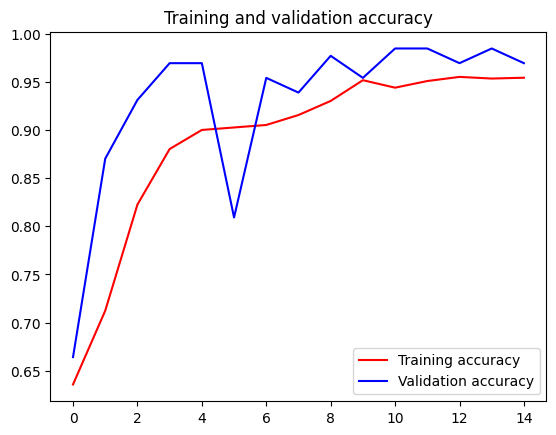

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()